In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

输出三张图依次为原图灰度图，大律法阈值分割图，迭代法阈值分割图。

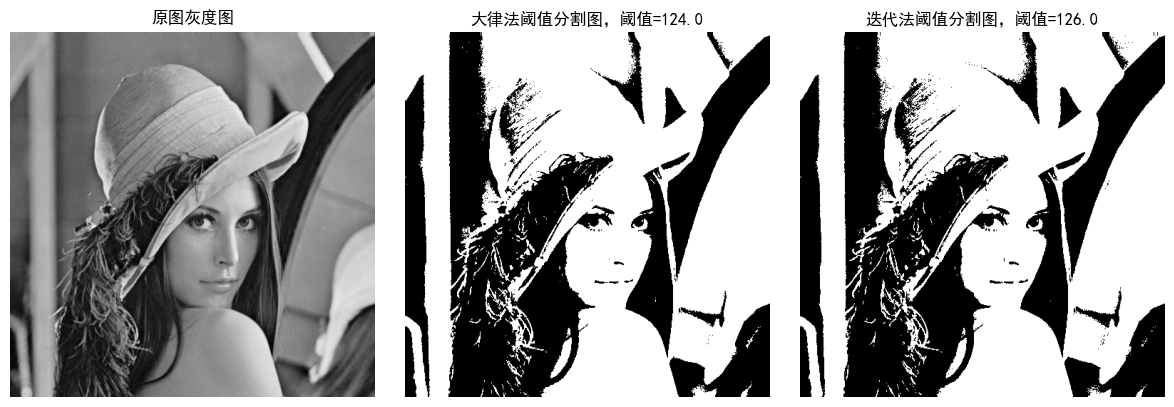

In [7]:
def OTSU(img):#大律法阈值分割
    n = img.size #图像点数
    Sigma = -1 #初始化sigma
    for m in range(0,256): #遍历灰度值
        fg = img[img>m] #前景
        bg = img[img<=m] #背景

        p1 = bg.size/n
        p0 = fg.size/n

        if bg.size==0:
            m1=0
        else:
            m1=bg.mean()
        
        if fg.size==0:
            m0=0
        else:
            m0=fg.mean()

        sigma=p1 * p0 * (m0 - m1)**2
        #print(sigma)
        if sigma>Sigma:
            Sigma=sigma
            th = m   
    return th

def Iterate_threshold(img):#迭代法阈值分割
    T = img.mean()
    
    while True:
        t0 = img[img < T].mean()
        t1 = img[img >= T].mean()
        t  = (t0 + t1) / 2
        if abs(T - t) < 1:
            break
        T = t
    T = int(T)
    
    return T

    

img = cv2.imread('lena.jpg',0)
T1 = OTSU(img)
T2 = Iterate_threshold(img)

t1, image1 = cv2.threshold(img,T1,255,cv2.THRESH_BINARY)
t2, image2 = cv2.threshold(img,T2,255,cv2.THRESH_BINARY)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([]),plt.title('原图灰度图'), plt.axis('off')
plt.subplot(132), plt.imshow(image1, 'gray'), plt.xticks([]), plt.yticks([]),plt.title('大律法阈值分割图，阈值='+str(t1)), plt.axis('off')
plt.subplot(133), plt.imshow(image2, 'gray'), plt.xticks([]), plt.yticks([]),plt.title('迭代法阈值分割图，阈值='+str(t2)), plt.axis('off')
plt.tight_layout()
plt.show()